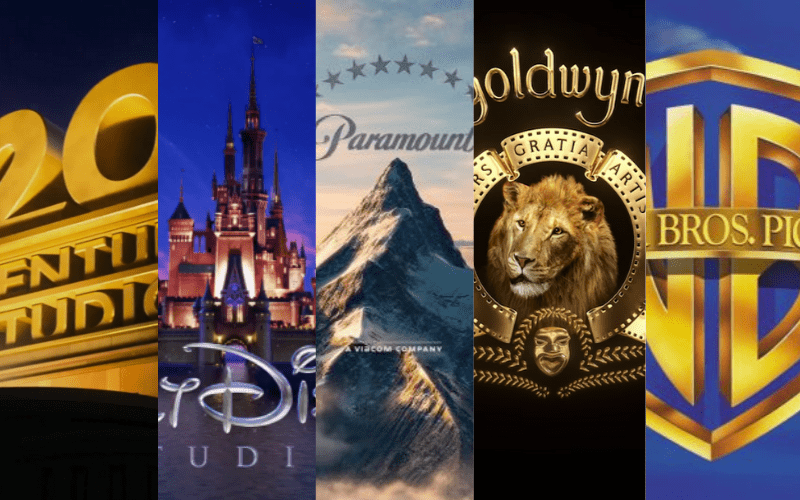

# Microsoft Movie Studios: A Studio Takeover

**Authors:** Christine Li
***

## Overview

This project analyzes the best performing films in the box office to give insights into what types of movies Microsoft Movie Studios should create. Exploratory data analysis of the data provides actionable insights on the target audience, genre and performance indicators which guide a film's success. Microsoft Movie Studios can use this analysis to create content and further considerations to achieve long-term success.

## Business Problem

Microsoft would like to create a movie studio and begin making films, however they have never made any films before. A movie studio's success depends on its ability to produce films that not only resonate with audiences but generates revenue. 

This project will allow stakeholders and Microsoft Movie Studios insights into what type of films are performing well in the box office in order to try and replicate that success. Analysing box office data provides the necessary insights to make informed decisions, minimise risks and increase the likelihood of financial success.

## Data Understanding

The data came from movie datasets such as Box Office Mojo and IMDB. This data was collected from studio reports, user reviews, box office reports and a combination of the above.

The data represents records for each individual movie including the title, release date, genre, budget, box office gross, and ratings which we will use to understand and create business insights from. 

Common variables for movie analysis will include title, release date, genre, production budget, box office gross, ratings, and cast and crew information. In this project our target variables will be the genre, ratings and box office performance. 

Some limitations that have implications to this project include:
* *Data Quality*: If the dataset has missing, incomplete or inaccurate data which can affect the reliability and accuracy of the results
* *Sample Quality*: If the sample is not representative of the entire population of movies e.g. focussing on just one genre, or if the size of the sample is not large enough it will not present accurate information. If the dataset also only covers a specific time period, trends or patterns may be overlooked.
* *Data Source*: The data's accuracy depends on the reliability of the sources, different sources may have varying levels of accuracy and coverage. 
* *Over-emphasis on variables*: In this project we are looking at box office performance to determine success, however there are other aspects which we will not be looking at here such as the film's cultural impact or long-term success which would still be important to consider for long-term success of the movie studios. 

Addressing these limitations through data cleaning, validation and good methodology will help enhance the credibility of the analysis.



In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



%matplotlib inline

In [2]:
#Creating dataframes for movie information, budget and ratings
df_basicinfo = pd.read_csv(r'/Users/christineli/Downloads/Phase-1-Project-master/zippedData/imdb.title.basics.csv')

df_imdb_rating = pd.read_csv(r'/Users/christineli/Downloads/Phase-1-Project-master/zippedData/imdb.title.ratings.csv.gz')

df_movie_gross = pd.read_csv(r'/Users/christineli/Downloads/Phase-1-Project-master/zippedData/bom.movie_gross.csv.gz')




In [3]:
df_basicinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [4]:
df_imdb_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [6]:
df_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


# df_basicinfo
This data came from the IMDB Movie Basics dataset and has 146144 entries including information about the movie name, release year (from 2010 onwards) and genre. 
The most valuable information in this dataset is that it puts a name to the film's that we want to analyse which in turn provides valuable insights into audience preferences. By studying the success of certain genres, studios can tailor their productions to align with what audiences enjoy.



In [7]:
df_basicinfo.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [8]:
df_basicinfo['genres']
df_basicinfo['genres'].value_counts() 
#We expect genres are categorical values.
#Can see that in this column, some films have multiple genres.

Documentary                32185
Drama                      21486
Comedy                      9177
Horror                      4372
Comedy,Drama                3519
                           ...  
Mystery,News,Thriller          1
Music,Mystery                  1
Comedy,Family,History          1
Adventure,Music,Mystery        1
Crime,Western                  1
Name: genres, Length: 1085, dtype: int64

In [9]:
df_basicinfo['start_year'].value_counts()  
#There are some outliers in start_year such as 2024, 2025, 2026, 2025 and 2115



2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2010    11849
2019     8379
2020      937
2021       83
2022       32
2023        5
2024        2
2027        1
2026        1
2025        1
2115        1
Name: start_year, dtype: int64

# df_imdb_rating
This data comes from the IMDB Ratings table and has 73865 entries including information about the film's average rating and number of votes.
Ratings provide valuable insight into how a film is received and positive ratings can indicate that a film is resonating well with its audience. Analysing positive ratings is important to identify what aspects of the movies are successful as positive reviews attract a wider audience generating more sales and long-term success.


In [10]:
df_imdb_rating.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [11]:
df_imdb_rating['averagerating'].describe()

count    73856.000000
mean         6.332729
std          1.474978
min          1.000000
25%          5.500000
50%          6.500000
75%          7.400000
max         10.000000
Name: averagerating, dtype: float64

In [12]:
df_imdb_rating['numvotes'].describe()

count    7.385600e+04
mean     3.523662e+03
std      3.029402e+04
min      5.000000e+00
25%      1.400000e+01
50%      4.900000e+01
75%      2.820000e+02
max      1.841066e+06
Name: numvotes, dtype: float64

# df_movie_gross
This data came from the Box Office Mojo dataset and has 3387 entries including the movie title and gross both domestic and world-wide. The important information from this dataset is the domestic and world-wide gross as this is a direct indicator of a movie's financial success. It represents the total revenue generated from ticket studios. Understanding the financial performance of their films is crucial for assessing profitability and making informed business decisions.




In [13]:
df_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [14]:
df_movie_gross['domestic_gross'].describe()

count    3.359000e+03
mean     2.874585e+07
std      6.698250e+07
min      1.000000e+02
25%      1.200000e+05
50%      1.400000e+06
75%      2.790000e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64

In [15]:
#convert object to float
df_movie_gross['foreign_gross'] = pd.to_numeric(df_movie_gross['foreign_gross'], errors = 'coerce')
df_movie_gross['foreign_gross'].describe()

#Box Office Gross is a numerical value which we expect to all be in a positive range
#which we can see in this dataset that the minimum is $600.

count    2.032000e+03
mean     7.505704e+07
std      1.375294e+08
min      6.000000e+02
25%      3.775000e+06
50%      1.890000e+07
75%      7.505000e+07
max      9.605000e+08
Name: foreign_gross, dtype: float64

## Data Preparation

**Data Cleaning**

*df_basicinfo*

In [16]:
#There are 146144 entries in this dataset.
#Check for duplicated values 
df_basicinfo.duplicated().value_counts() 
#There are no duplicated values 

#Check for missing values
df_basicinfo.isna().sum() 
#There are 21 missing text values in original_title, 31739 missing numerical values in runtime_minutes 
#and 5408 missing text values in genres.

#Drop the runtime_minutes column (large missing values)
#Drop original_title column (unnecessary as primary_title has no null and provides same information)
basic = df_basicinfo.drop(['runtime_minutes', 'original_title'], axis =1)
basic.isna().sum() 
 


tconst              0
primary_title       0
start_year          0
genres           5408
dtype: int64

*df_imdb_rating*

In [17]:
#There are 73856 entries in total in this dataset.

#Check for duplicated values
df_imdb_rating.duplicated().sum() #There are 0 duplicated values

#Check for missing values
df_imdb_rating.isna().sum() #There are 0 missing values


tconst           0
averagerating    0
numvotes         0
dtype: int64

*df_movie_gross*

In [18]:
#There are 3387 entries in total in this dataset.
#Check for duplicated values
df_movie_gross.duplicated().sum() #There are 0 duplicated values

#Check for missing values
df_movie_gross.isna().sum()
#While there are foreign gross and domestic gross values that are missing
#each record still has valuable information so we did not drop any of these rows.

#Drop unnecessary columns like studio and year
df_movie_gross = df_movie_gross.drop(['studio', 'year'], axis = 1)

**Merging Datasets**

Merge *df_basicinfo*, *df_imdb_rating* on tconst and merge to *df_movie_gross* on title. I renamed the primary title of the IMDB dataframes to title so that it can have a 1:1 merge with the Box Office Mojo dataframe.

This will create a single table **df_final** with all the information including name, genre, rating and gross (domestic and foreign). We can then use this table for our data analysis.




In [19]:
joined = pd.merge(basic, df_imdb_rating, on = "tconst", how = "left")
joined

joinedtitle = joined.rename(columns={'primary_title':'title'})
joinedtitle

df_final = pd.merge(joinedtitle, df_movie_gross, on = "title", how = "left")
df_final.info()





<class 'pandas.core.frame.DataFrame'>
Int64Index: 146146 entries, 0 to 146145
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          146146 non-null  object 
 1   title           146146 non-null  object 
 2   start_year      146146 non-null  int64  
 3   genres          140738 non-null  object 
 4   averagerating   73858 non-null   float64
 5   numvotes        73858 non-null   float64
 6   domestic_gross  3342 non-null    float64
 7   foreign_gross   2039 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 10.0+ MB


In [20]:
df_final.head()

,tconst,title,start_year,genres,averagerating,numvotes,domestic_gross,foreign_gross
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.0,77.0,NaN,NaN
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.2,43.0,NaN,NaN
2,tt0069049,The Other Side of the Wind,2018,Drama,6.9,4517.0,NaN,NaN
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13.0,NaN,NaN
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5,119.0,NaN,NaN


Create a new column that will have total_gross column.

In [21]:
df_final['total_gross'] = df_final['domestic_gross'] + df_final['foreign_gross']


Clean final dataframe

In [22]:
df_final['title'].duplicated().sum() #There are 10075 duplicated titles
df_final.groupby(by ='title')
df_final.duplicated().sum() #There are now no duplicated titles records

0

## Analysis & Data Modelling 

## Gross

The total gross performance of film in the Top 50 films has a median of 960 million with a range from 807 million to 1.4 billion. 
 
Looking at the Top 50 grossing movies, we can see that for the total gross of a movie, the foreign market tends to bring in more revenue overall compared to the domestic market. 

**Top 50 Gross Dataset**


As there are more than 140000 entries in the final database, it is very overwhelming to look at! We will only look at the top 50 box office successful films to for our analysis. 

In [23]:
top50_gross = df_final.sort_values(by =['total_gross'], ascending = False).head(50)


**A Film's Total Gross Performance**

In [24]:
top50_gross['total_gross'].describe()

count    5.000000e+01
mean     1.007866e+09
std      1.714524e+08
min      8.071000e+08
25%      8.576000e+08
50%      9.602500e+08
75%      1.120000e+09
max      1.405400e+09
Name: total_gross, dtype: float64

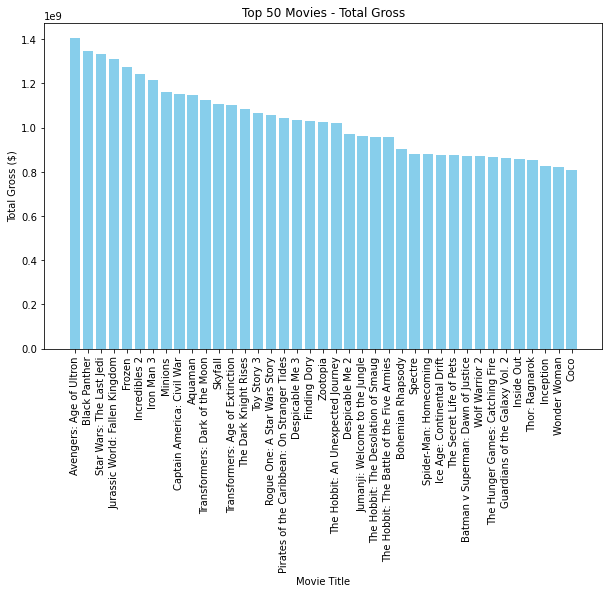

In [25]:
#Create Plot
plt.figure(figsize=(10, 6))
plt.bar(top50_gross['title'],top50_gross['total_gross'], color = 'skyblue')

#Customise Plot
plt.title('Top 50 Movies - Total Gross')
plt.xlabel('Movie Title')
plt.ylabel('Total Gross ($)')
plt.xticks(rotation=90)

plt.show()



**Domestic and Foreign Gross of the Top 50 Grossing Films**

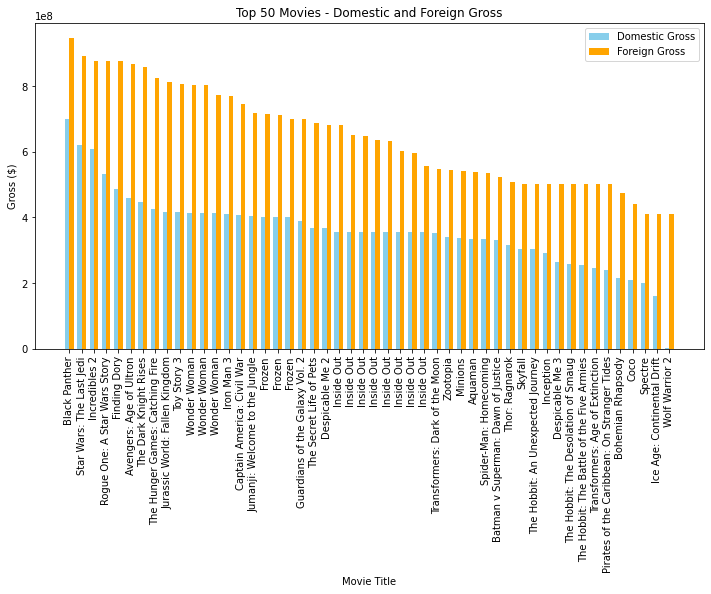

In [26]:
domestictop50 = top50_gross.sort_values(by='domestic_gross', ascending=False).head(50)
foreigntop50 = top50_gross.sort_values(by='foreign_gross', ascending=False).head(50)

#Create Plot
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(top50_gross['title']))

# Domestic Gross bars
ax.bar(index, domestictop50['domestic_gross'], bar_width, label='Domestic Gross', color='skyblue')

# Foreign Gross bars
ax.bar(index + bar_width, foreigntop50['foreign_gross'], bar_width, label='Foreign Gross', color='orange')

# Customize the plot
ax.set_title('Top 50 Movies - Domestic and Foreign Gross')
ax.set_xlabel('Movie Title')
ax.set_ylabel('Gross ($)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(domestictop50['title'], rotation=90)
ax.legend()

plt.show()


## Ratings

The average rating is on a scale for 1 - 10. For the top grossing 50 movies 7.1 is the median rating with 4.2 being the lowest rated movie and 8.8 being the highest rated movie.
When looking at our top grossing 50 movies, the highest rated films are not the films that have generated the most gross profit. For example the top grossing film is "Avengers: Age of Ultron", but the top rated film is "Inception". 


When we look at our scatterplot detailing the relatinship between Average Rating and Number of Votes, we can see that majority of the top 50 grossing film's had less than 700000 number of votes with ratings between 6.0 and 8.0. 






**Top 50 Rated Films Dataset**

This project is looking at films currently doing the best in the box office. We will conduct our ratings analysis on the top 50 grossing dataset we created above.

In [27]:
# Describing the ratings of the top 50 grossing films.
top50_gross_ratings = top50_gross.sort_values(by = ['averagerating'],ascending = False)
top50_gross_ratings

,tconst,title,start_year,genres,averagerating,numvotes,domestic_gross,foreign_gross,total_gross
7066,tt1375666,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066.0,292600000.0,535700000.0,8.283000e+08
6900,tt1345836,The Dark Knight Rises,2012,"Action,Thriller",8.4,1387769.0,448100000.0,636800000.0,1.084900e+09
104,tt0435761,Toy Story 3,2010,"Adventure,Animation,Comedy",8.3,682218.0,415000000.0,652000000.0,1.067000e+09
28269,tt2096673,Inside Out,2015,"Adventure,Animation,Comedy",8.2,536181.0,356500000.0,501100000.0,8.576000e+08
14971,tt1727824,Bohemian Rhapsody,2018,"Biography,Drama,Music",8.0,345466.0,216400000.0,687200000.0,9.036000e+08
49580,tt2948356,Zootopia,2016,"Adventure,Animation,Comedy",8.0,383446.0,341300000.0,682500000.0,1.023800e+09
434,tt0903624,The Hobbit: An Unexpected Journey,2012,"Adventure,Family,Fantasy",7.9,719629.0,303000000.0,718100000.0,1.021100e+09
60467,tt3501632,Thor: Ragnarok,2017,"Action,Adventure,Comedy",7.9,482995.0,315100000.0,538900000.0,8.540000e+08
5507,tt1074638,Skyfall,2012,"Action,Adventure,Thriller",7.8,592221.0,304400000.0,804200000.0,1.108600e+09
5729,tt1170358,The Hobbit: The Desolation of Smaug,2013,"Adventure,Fantasy",7.8,565563.0,258399999.0,700000000.0,9.584000e+08


In [28]:
top50_gross

,tconst,title,start_year,genres,averagerating,numvotes,domestic_gross,foreign_gross,total_gross
39010,tt2395427,Avengers: Age of Ultron,2015,"Action,Adventure,Sci-Fi",7.3,665594.0,459000000.0,946400000.0,1.405400e+09
19050,tt1825683,Black Panther,2018,"Action,Adventure,Sci-Fi",7.3,516148.0,700100000.0,646900000.0,1.347000e+09
42224,tt2527336,Star Wars: The Last Jedi,2017,"Action,Adventure,Fantasy",7.1,462903.0,620200000.0,712400000.0,1.332600e+09
84415,tt4881806,Jurassic World: Fallen Kingdom,2018,"Action,Adventure,Sci-Fi",6.2,219125.0,417700000.0,891800000.0,1.309500e+09
6647,tt1323045,Frozen,2010,"Adventure,Drama,Sport",6.2,62311.0,400700000.0,875700000.0,1.276400e+09
35107,tt2294629,Frozen,2013,"Adventure,Animation,Comedy",7.5,516998.0,400700000.0,875700000.0,1.276400e+09
10824,tt1611845,Frozen,2010,"Fantasy,Romance",5.4,75.0,400700000.0,875700000.0,1.276400e+09
62742,tt3606756,Incredibles 2,2018,"Action,Adventure,Animation",7.7,203510.0,608600000.0,634200000.0,1.242800e+09
6453,tt1300854,Iron Man 3,2013,"Action,Adventure,Sci-Fi",7.2,692794.0,409000000.0,805800000.0,1.214800e+09
35077,tt2293640,Minions,2015,"Adventure,Animation,Comedy",6.4,193917.0,336000000.0,823400000.0,1.159400e+09


**Comparing Gross and Ratings of the Top 20 Films** (within the top 50 grossing films)

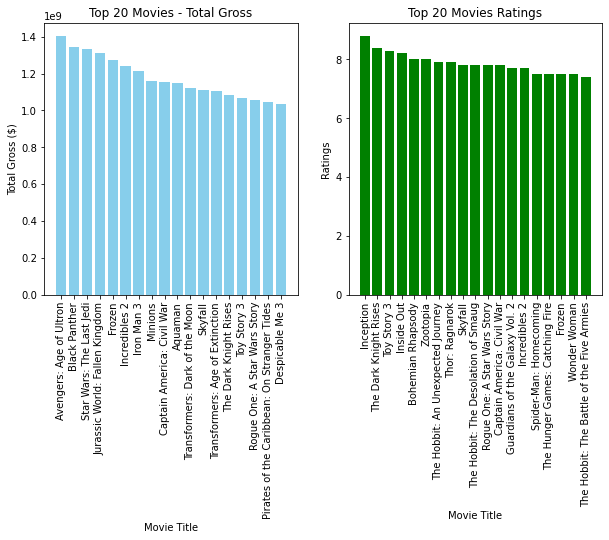

In [29]:
#Create Comparison Graph
fig, axes = plt.subplots(ncols = 2, nrows = 1, figsize = (10, 5))

#Highest grossing dataset
axes_left = axes[0]
axes_left.bar(top50_gross['title'].head(20), top50_gross['total_gross'].head(20), color='skyblue')
axes_left.set_title('Top 20 Movies - Total Gross')
axes_left.set_xlabel('Movie Title')
axes_left.set_ylabel('Total Gross ($)')
axes_left.tick_params(axis='x', rotation=90)

#Ratings of the highest grossing dataset
axes_right = axes[1]
axes_right.bar(top50_gross_ratings['title'].head(20), top50_gross_ratings['averagerating'].head(20), color='green')
axes_right.set_title('Top 20 Movies Ratings')
axes_right.set_xlabel('Movie Title')
axes_right.set_ylabel('Ratings')
axes_right.tick_params(axis='x', rotation=90)

plt.show()

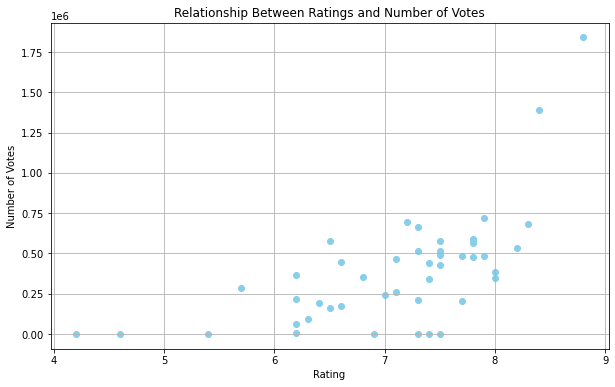

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(top50_gross['averagerating'], top50_gross['numvotes'], color='skyblue')

# Customize the plot
plt.title('Relationship Between Ratings and Number of Votes')
plt.xlabel('Rating')
#plt.xlim(0) - Starting the x-axis label at 0 causes the whole data to be squashed on one side of the graph
plt.ylabel('Number of Votes')
plt.grid(True)


plt.show()

## Genres

The most popular genres of film in the top 50 grossing films is Adventure followed by Action and Comedy. There are 36 films in the Adventure genre in the top 50 grossing films. 
If we take a closer look at the top 50 grossing films as an indicator of a success, most of our top 50 films have multiple genres with Action, Adventure, Sci-Fi being the most popular combination for a successful movie. 








In [34]:
top50_gross['genres'].value_counts()

Action,Adventure,Sci-Fi          11
Adventure,Animation,Comedy       10
Action,Adventure,Fantasy          5
Action,Adventure,Comedy           3
Adventure,Fantasy                 2
Action,Adventure,Thriller         2
Documentary,Drama,Sport           1
Documentary                       1
Horror                            1
Crime,Drama                       1
Action,Adventure,Animation        1
Biography,Drama,Music             1
Biography,Documentary,History     1
Adventure,Drama,Sport             1
Fantasy,Romance                   1
Action,Drama,Thriller             1
Action,Thriller                   1
Family                            1
Sci-Fi                            1
Drama                             1
Adventure,Family,Fantasy          1
Name: genres, dtype: int64

In [31]:
#Some movies have multiple genres, so we want to split the genre column into it's unique genres
top_gross_genres = top50_gross['genres'].str.split(',', expand = True).stack()
top_gross_genres.value_counts()

Adventure      36
Action         24
Comedy         13
Sci-Fi         12
Animation      11
Fantasy         9
Drama           6
Thriller        4
Documentary     3
Sport           2
Biography       2
Family          2
History         1
Horror          1
Music           1
Romance         1
Crime           1
dtype: int64

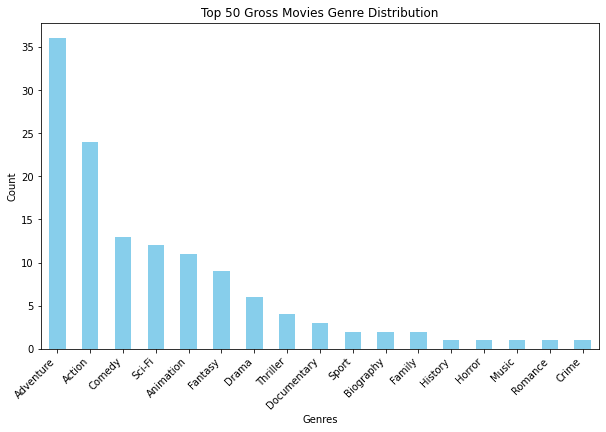

In [32]:
top_gross_genre_counts = top_gross_genres.value_counts()

# Create a plot
plt.figure(figsize=(10, 6))
top_gross_genre_counts.plot(kind='bar', color='skyblue')

# Customize the plot
plt.title('Top 50 Gross Movies Genre Distribution')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 

plt.show()

## Evaluation

Analysing the target variables of movie genres, gross box office performance and ratings in this project allows Microsoft Movie Studios and stakeholders insights into what types of films to create. 

I interpret these results that foriegn audiences bring in most of the gross, the highest rated films are not necessarily the most profitable and the Adventure genre are the most common genres in the top grossing films. 

I am confident these results will generalize beyond the data, as we have done analyses on these datasets which have been transformed to be as accurate and useful as possible.

I am also confident that these results will benefit Microsoft Movie Studios if they use these results to create content that have already been researched to be successful and and provide the best chance to launch their studios into the industry.

## Conclusions
This analysis of box office films leads to three recommendations for Microsoft Movie Studios:

**Capitalise on the foreign market**: The box office gross is a direct indicator of a movie's financial success. A large proportion of the total gross of films comes from foreign gross as opposed to the domestic gross. Microsoft should capitalize on this area and allocate more promotional and marketing materials to incentivise more audiences to watch the film. Understanding the geographic distribution of revenue can highlight the film's global appeal.


**Ratings drive decision-making:** Ratings provide valuable feedback on how well a film has received and the overall quality of a film. Positive ratings contribute to positive word-of-mouth driving audience attendance and marketing/promotional materials to attract audiences. Microsoft should endeavour to create films of high quality as positive ratings help establish a studio's credibility and create a loyal audience base. By continuing to monitor audience reactions, scores on platforms like IMDB and other sites, Microsoft can gain insights into what worked well and what could be improved which is invaluable for tailoring future content to better align with audiences.

Microsoft should also keep in mind that the ratings can be skewed by the number of votes and the demographic of audience whom are voting. Ratings are inherently subjective and vary based on the individual e.g. critics may focus on artistic elements but the general audience prioritises entertainment.


**Create films in the Adventure genre; ideally start with an Adventure, Action and Sci-Fi film**: The top 50 grossing films have a combination of genres that include Adventure.  Microsoft Movie Studios should identify what their target audience wants and capitalize on the type of content they want to see. As they are a fledging movie studio, not only do audiences find entertainment value in the Adventure genre, these types of films are among the most profitable, so the studios should start by creating films which include this genre to have the best chance of success. Most films are not a single genre only and the most frequent combination of genres is Adventure, Action and Sci-fi in our top grossing films so Microsoft should start with making one of these. 

Microsoft should tailor promotional materials to the audience associated with each genre. Centain genres can create dedicated fan bases and creating content around this genres can lead to increased audience loyalty and long-term success.

While Adventure is a successful genre, if they continue to produce films similar the top 50 films, this could lead to a market saturation and lack of originality. Originality plays a significant role in capturing audience attention and staying relevent. 


---
While this project analysis aims to explore what type of films are currently doing the best at the box office, as the audience changes, industry trends can change as well. This information is most useful for Microsoft to launch their studios and create for the now, however it will be important to continue doing research to keep ontop of industry trends. Audience preferences evolve over time and the success of a particular set of films may not accurately predict future success.


## Next Steps

Further analyses could bring additional insights to further improve Microsoft Movie Studios long-term success:

* **Budget vs Gross:** Compare the film's production budget with it's gross revenue helps assess profitability and return on investment. The film would be considered not only successful to it's audiences but to stakeholders if revenue significantly exceeds its budget. 

* **Budget vs Ratings:** Consider whether a high-budget production receives higher ratings and vice versa. 

* **Genre Diversification:** Understanding the performance of different genres enables studios to diversity their portfolios. 
Investing in a range of genres can lessen the risk associated with any change in popularity of a certain genre. Once established, capitalizing on less-explored genres can provide a competitive edge and offer unique content to audiences.




